# Machine Learning Recipes with Josh Gordon

[machine-learning-recipes with Josh Gordon](https://www.youtube.com/playlist?list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal)
[Github-Josh Gordon](https://github.com/random-forests)
[中文字幕video-machine-learning-recipes with Josh Gordon](http://www.mooc.ai/course/96/learn?lessonid=634#lesson/634)

[machine-learning-recipes学习资源和代码](http://blog.csdn.net/fyuanfena/article/details/52312961)
[Github-machine-learning-recipes学习资源和代码](https://github.com/fyuanfen/Machine-Learning-Recipe)

In [ ]:
# -*- coding: UTF-8 -*-
from __future__ import division
#from __future__ import print_function

In [1]:
# Part 1 - Hello World - https://youtu.be/cKxRvEZd3Mw

# Follow a recipe for supervised learning (a technique to create a classifier from examples) and code it up.

from sklearn import tree

# Examples
# Weight Texture Label
# 150g   Bumpy   Orange
# 170g   Bumpy   Orange
# 140g   Smooth  Apple
# 130g   Smooth  Apple

# Training Data
# features = [[140, "smooth"], [130, "smooth"], [150, "bumpy"], [170, "bumpy"]]  # Input to classifier
features = [[140, 1], [130, 1], [150, 0], [170, 0]]  # scikit-learn uses real-valued features
# labels = ["apple", "apple", "orange", "orange"]  # Desired output
labels = [0, 0, 1, 1]

# Train Classifer
clf = tree.DecisionTreeClassifier()  # Decision Tree classifier
clf = clf.fit(features, labels)  # Find patterns in data

# Make Predictions
print clf.predict([[160, 0]])
# Output: 0-apple, 1-orange
# Correct output is: 1-orange

[1]


In [7]:
# Part 2 - Visualizing a Decision Tree - https://youtu.be/tNa99PG8hR8

# Build one on a real dataset, add code to visualize it, and practice reading it - so you can see how it works under the
# hood.

# Use Iris flower data set: https://en.wikipedia.org/wiki/Iris_flower_data_set
# Identify type of flower based on measurements
# Dataset includes 3 species of Iris flowers: setosa, versicolor, virginica
# 4 features used to describe: length and width of sepal and petal
# 50 examples of each type for 150 total examples

# Goals
# 1-Import dataset
# 2-Train a classifier
# 3-Predict label for new flower
# 4-Visualize the tree

# scikit-learn datasets: http://scikit-learn.org/stable/datasets/
# already includes Iris dataset: load_iris

from sklearn.datasets import load_iris

iris = load_iris()
print dir(iris)
print(type(iris))
print iris.feature_names  # metadata: names of the features
print iris.target_names  # metadata: names of the different types of flowers
# print iris.data  # features and examples themselves
print iris.data[0]  # first flower
print iris.target[0]  # contains the labels

#print entire dataset
for i in xrange(len(iris.target)):
    print "Example %d: label %s, features %s" % (i, iris.target[i], iris.data[i])

# Testing Data
# Examples used to test the classifier's accuracy
# Not part of the training data

import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
# here, we remove the first example of each flower
# found at indices: 0, 50, 100
test_idx = [0, 50, 100]

# create 2 new sets of variables, for training and testing
# training data
# remove the entires from the data and target variables
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

# testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

# create new classifier
clf = tree.DecisionTreeClassifier()
# train on training data
clf.fit(train_data, train_target)

# what we expect
print test_target
# what tree predicts
print clf.predict(test_data)

# Visualize
# from scikit decision tree tutorial: http://scikit-learn.org/stable/modules/tree.html
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     impurity=False)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("iris.pdf")


['DESCR', 'data', 'feature_names', 'target', 'target_names']
<class 'sklearn.utils.Bunch'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2]
0
Example 0: label 0, features [ 5.1  3.5  1.4  0.2]
Example 1: label 0, features [ 4.9  3.   1.4  0.2]
Example 2: label 0, features [ 4.7  3.2  1.3  0.2]
Example 3: label 0, features [ 4.6  3.1  1.5  0.2]
Example 4: label 0, features [ 5.   3.6  1.4  0.2]
Example 5: label 0, features [ 5.4  3.9  1.7  0.4]
Example 6: label 0, features [ 4.6  3.4  1.4  0.3]
Example 7: label 0, features [ 5.   3.4  1.5  0.2]
Example 8: label 0, features [ 4.4  2.9  1.4  0.2]
Example 9: label 0, features [ 4.9  3.1  1.5  0.1]
Example 10: label 0, features [ 5.4  3.7  1.5  0.2]
Example 11: label 0, features [ 4.8  3.4  1.6  0.2]
Example 12: label 0, features [ 4.8  3.   1.4  0.1]
Example 13: label 0, features [ 4.3  3.   1.1  0.1]
Example 14: label 0, features [ 5.8  4.   1.2  0

True

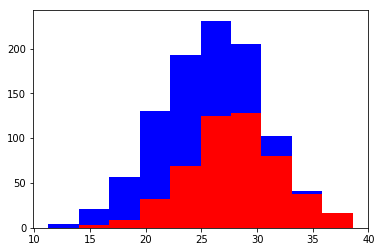

In [3]:
# Part 3 - What Makes a Good Feature? - https://youtu.be/N9fDIAflCMY

# Good features are informative, independent, and simple. We'll introduce these concepts by using a histogram to
# visualize a feature from a toy dataset.

import matplotlib.pyplot as plt
import numpy as np

# Create population of 1000 dog, 50/50 greyhound/labrador
greyhounds = 500
labs = 500

# Assume greyhounds are normally 28" tall
# Assume labradors are normally 24" tall
# Assume normal distribution of +/- 4"
grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

# Greyounds - red, labradors - blue
plt.hist([grey_height, lab_height], stacked=True, color=['r', 'b'])
plt.show()

# Independent features are best
# Avoid redundant features (height in in AND height in cm)

# Ideal features are:
# Informative
# Independent
# Simple


In [4]:
# Let's Write a Pipeline - Machine Learning Recipes #4 - https://youtu.be/84gqSbLcBFE

# How to test a model and determine accuracy

# Partition data into 2 sets, train and test

# import a dataset
from sklearn import datasets

iris = datasets.load_iris()

# Can think of classifier as a function f(x) = y
X = iris.data  # features
y = iris.target  # labels

# partition into training and testing sets
from sklearn.cross_validation import train_test_split

# test_size=0.5 -> split in half
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Classifier
from sklearn import tree

my_classifier = tree.DecisionTreeClassifier()
my_classifier.fit(X_train, y_train)

# predict
predictions = my_classifier.predict(X_test)
print predictions

# test
from sklearn.metrics import accuracy_score

print accuracy_score(y_test, predictions)

# Repeat using KNN
# Classifier
from sklearn.neighbors import KNeighborsClassifier

my_classifier = KNeighborsClassifier()
my_classifier.fit(X_train, y_train)

# predict
predictions = my_classifier.predict(X_test)
print predictions

# test
from sklearn.metrics import accuracy_score

print accuracy_score(y_test, predictions)


[2 1 0 1 2 0 2 2 0 0 1 2 0 0 2 2 0 1 0 2 2 1 2 2 0 1 0 0 1 0 1 1 1 1 2 2 0
 2 1 0 1 1 2 2 0 1 1 2 0 2 2 1 0 0 0 1 2 1 0 2 1 2 1 1 0 2 2 2 1 0 2 2 0 1
 1]
0.96
[2 1 0 1 2 0 2 2 0 0 1 2 0 0 2 2 0 1 0 2 2 1 2 2 0 1 0 0 1 0 1 1 2 1 2 2 0
 2 1 0 1 1 2 2 0 1 1 2 0 2 2 1 0 0 0 1 2 1 0 2 1 2 1 1 0 2 2 2 1 0 2 2 0 1
 1]
0.973333333333


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# Writing Our First Classifier - Machine Learning Recipes #5 - https://youtu.be/AoeEHqVSNOw

from scipy.spatial import distance


def euc(a, b):
    return distance.euclidean(a, b)


class ScrappyKNN():
    """
    Barebones KNN
    """

    def fit(self, X_train, y_train):
        """
        Takes features and labels for training set as input
        :param X_train:
        :param y_train:
        :return:
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """
        Receives features for testing data
        Output predictions for labels
        :param X_test:
        :return:
        """
        predictions = []
        for row in X_test:
            # label = random.choice(self.y_train)  # Random decision
            label = self.closest(row)
            predictions.append(label)

        return predictions

    def closest(self, row):
        """
        Find the closest training point
        :param row:
        :return:
        """
        # Distance from test point to first training point
        best_dist = euc(row, self.X_train[0])  # Shortest distance found so far
        best_index = 0  # index of closest training point
        for i in xrange(1, len(self.X_train)):  # Iterate over all other training points
            dist = euc(row, self.X_train[i])
            if dist < best_dist:  # Found closer, update
                best_dist = dist
                best_index = i
        return self.y_train[best_index]  # closest example


from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# from sklearn.neighbors import KNeighborsClassifier
my_classifier = ScrappyKNN()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)

from sklearn.metrics import accuracy_score

print accuracy_score(y_test, predictions)


0.92
